## EDA and stats on Insurance History Data

In [1]:
import sys
import os


notebook_dir = os.getcwd()  # Get current working directory (notebooks folder)
project_dir = os.path.abspath(os.path.join(notebook_dir, '..'))  # Go up one level
src_dir = os.path.join(project_dir, 'src')  # Path to scripts
sys.path.append(src_dir)

In [2]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from load_data import DataLoader
from eda_data import DataCleaner
from visualize_data import Visualizer

## Importing Data

In [3]:
#Import data
file_path = "../data/raw/MachineLearningRating_v3.txt"
data = DataLoader()
df = data.load_data(file_path)

C:\Users\hp\Documents\10\alphacare-insurance-solutions-week3\src\load_data.py:34: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='|')


   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

## Data cleaning

In [4]:
cleaner = DataCleaner()
cleaned_df = cleaner.clean_data(df)


📊 Initial Data Description:
        UnderwrittenCoverID      PolicyID     TransactionMonth  \
count          1.000098e+06  1.000098e+06              1000098   
unique                  NaN           NaN                   23   
top                     NaN           NaN  2015-08-01 00:00:00   
freq                    NaN           NaN               106747   
mean           1.048175e+05  7.956682e+03                  NaN   
std            6.329371e+04  5.290039e+03                  NaN   
min            1.000000e+00  1.400000e+01                  NaN   
25%            5.514300e+04  4.500000e+03                  NaN   
50%            9.408300e+04  7.071000e+03                  NaN   
75%            1.391900e+05  1.107700e+04                  NaN   
max            3.011750e+05  2.324600e+04                  NaN   

       IsVATRegistered Citizenship   LegalType    Title Language  \
count          1000098     1000098     1000098  1000098  1000098   
unique               2           4        

C:\Users\hp\Documents\10\alphacare-insurance-solutions-week3\src\eda_data.py:98: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


⚠️ Column 'NumberOfVehiclesInFleet' not found in DataFrame — skipping.
🔄 Replacing existing file: MachineLearningRatingV3_cleaned.csv
✅ Cleaned data saved to: ../data/processed/MachineLearningRatingV3_cleaned.csv


## Data Visualization

In [5]:
data = Visualizer(cleaned_df)

## Univariate Analysis

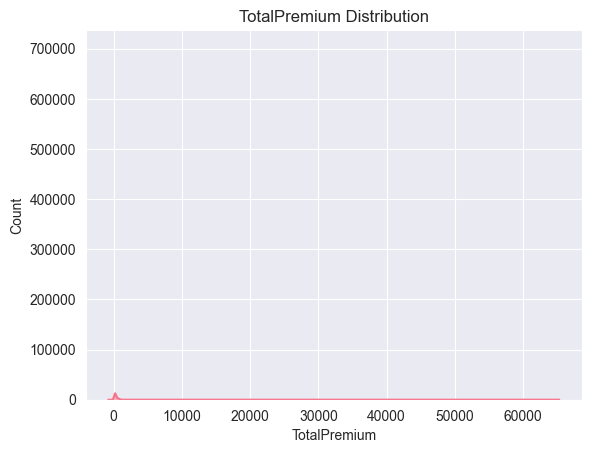

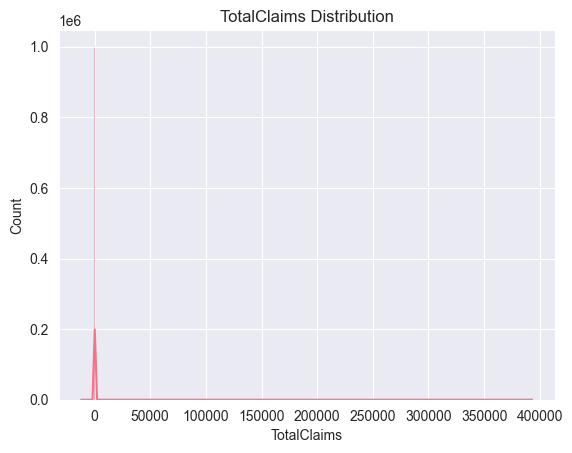

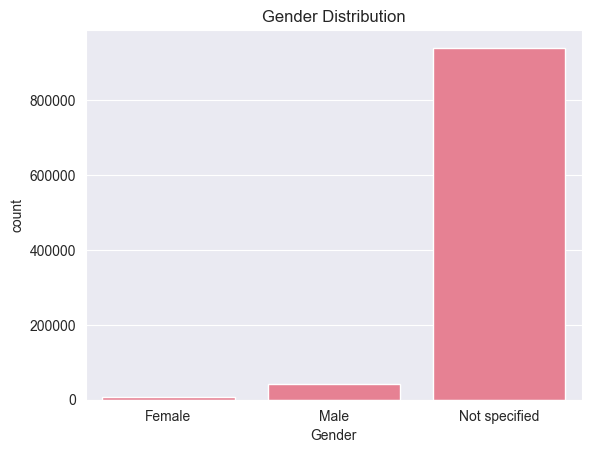

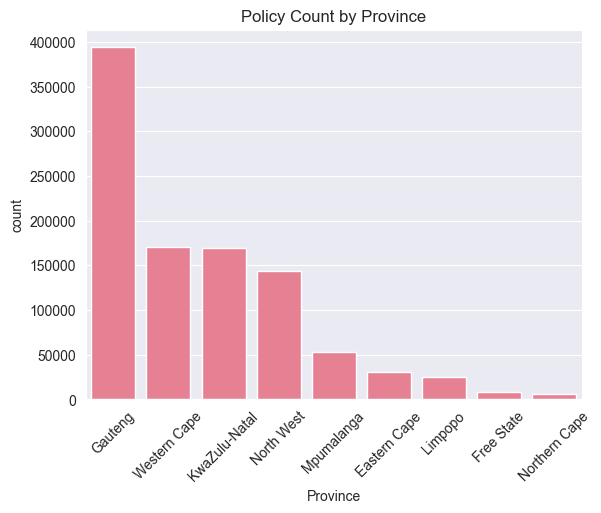

In [6]:
data.univariate_analysis()

## Bivariate and Multivariate Analysis

C:\Users\hp\Documents\10\alphacare-insurance-solutions-week3\venv\Lib\site-packages\matplotlib\transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),
C:\Users\hp\Documents\10\alphacare-insurance-solutions-week3\venv\Lib\site-packages\matplotlib\transforms.py:2436: RuntimeWarning: invalid value encountered in dot
  return Affine2D(np.dot(self._b.get_affine().get_matrix(),


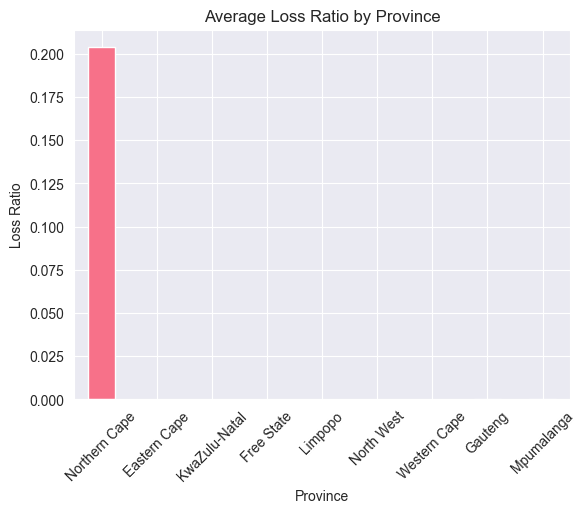

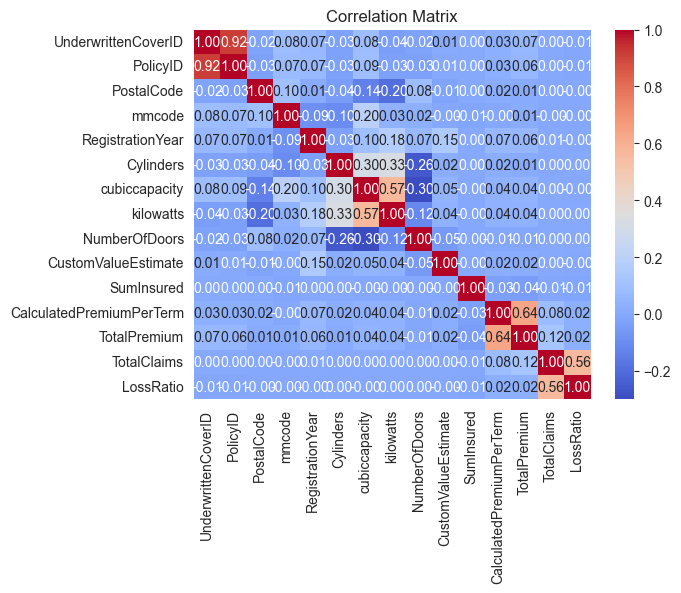

In [7]:
data.bivariate_multivariate_analysis()

## Outlier Detection

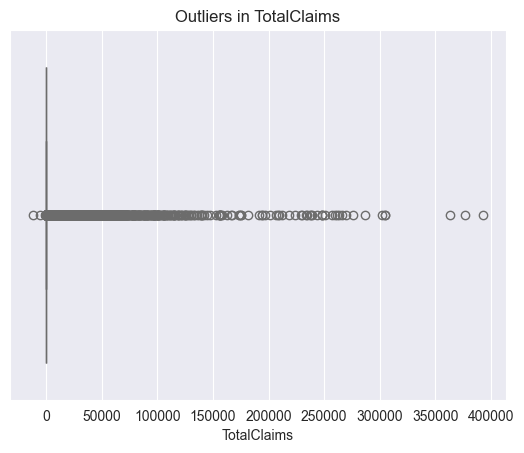

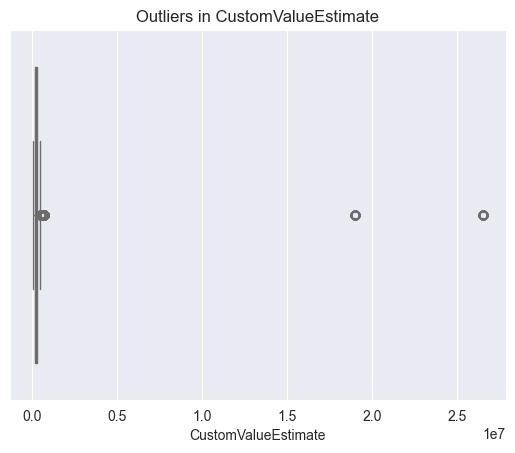

In [8]:
data.outlier_detection()

## Loss Ratio Visualization

Overall Loss Ratio: 1.05
               LossRatio
Province                
Gauteng         1.222018
KwaZulu-Natal   1.082693
Western Cape    1.059472
North West      0.790367
Mpumalanga      0.720897
Free State      0.680758
Limpopo         0.661199
Eastern Cape    0.633813
Northern Cape   0.282699


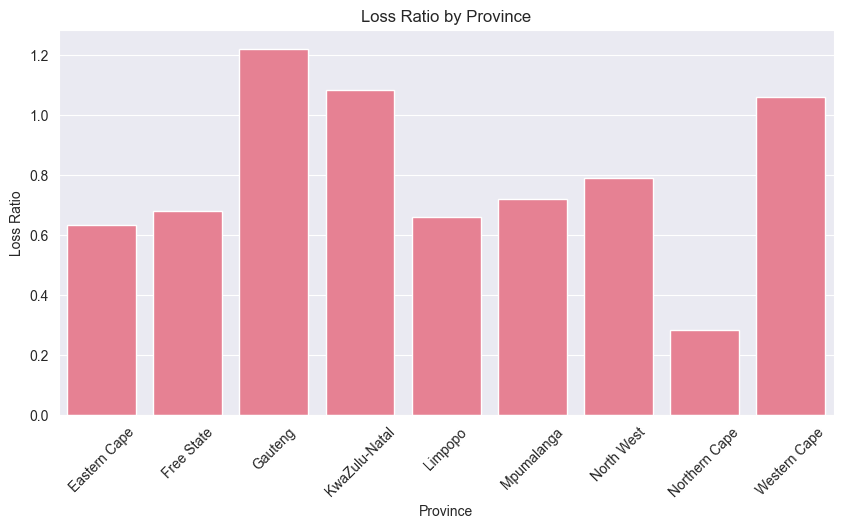

               LossRatio
Gender                  
Female          0.821879
Male            0.883910
Not specified   1.059311


C:\Users\hp\Documents\10\alphacare-insurance-solutions-week3\src\visualize_data.py:112: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_loss = self.data.groupby('Gender')[['TotalClaims', 'TotalPremium']].sum()


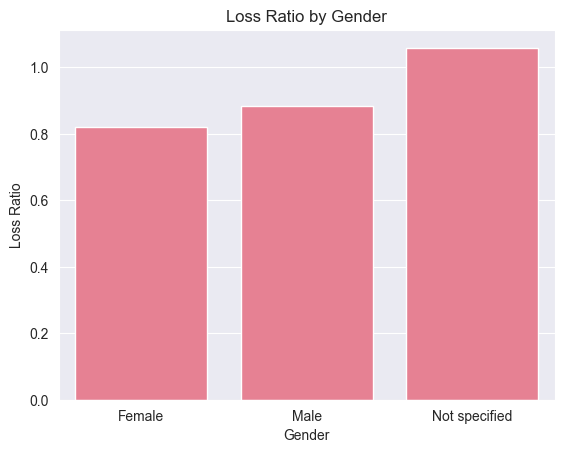

C:\Users\hp\Documents\10\alphacare-insurance-solutions-week3\src\visualize_data.py:125: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehicle_loss = self.data.groupby('VehicleType')[['TotalClaims', 'TotalPremium']].sum()


                   LossRatio
VehicleType                 
Heavy Commercial    1.628112
Medium Commercial   1.050251
Passenger Vehicle   1.048198
Light Commercial    0.232066
Bus                 0.137292


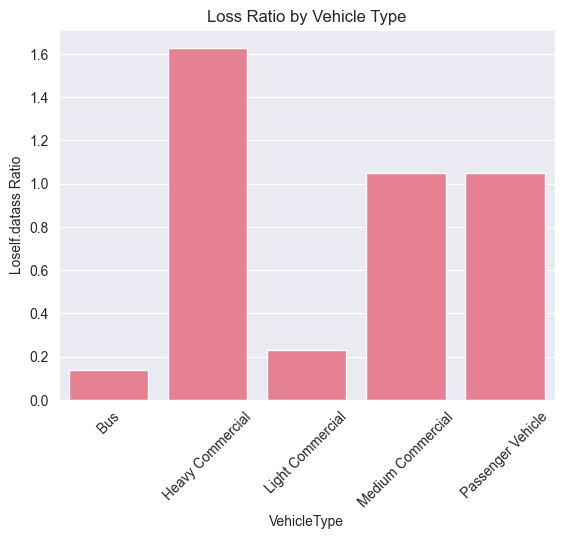

,TotalClaims,TotalPremium,LossRatio
Province,,,
Eastern Cape,1.356427e+06,2.140104e+06,0.633813
Free State,3.549223e+05,5.213632e+05,0.680758
Gauteng,2.939415e+07,2.405377e+07,1.222018
KwaZulu-Natal,1.430138e+07,1.320908e+07,1.082693
Limpopo,1.016477e+06,1.537324e+06,0.661199
Mpumalanga,2.044675e+06,2.836292e+06,0.720897
North West,5.920250e+06,7.490508e+06,0.790367
Northern Cape,8.949051e+04,3.165581e+05,0.282699
Western Cape,1.038977e+07,9.806559e+06,1.059472


In [9]:
data.calc_loss_ratio()

## Plot correlations

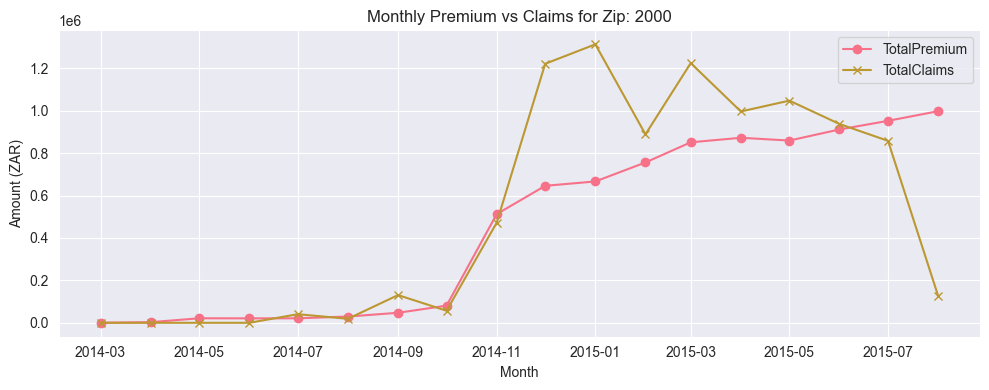

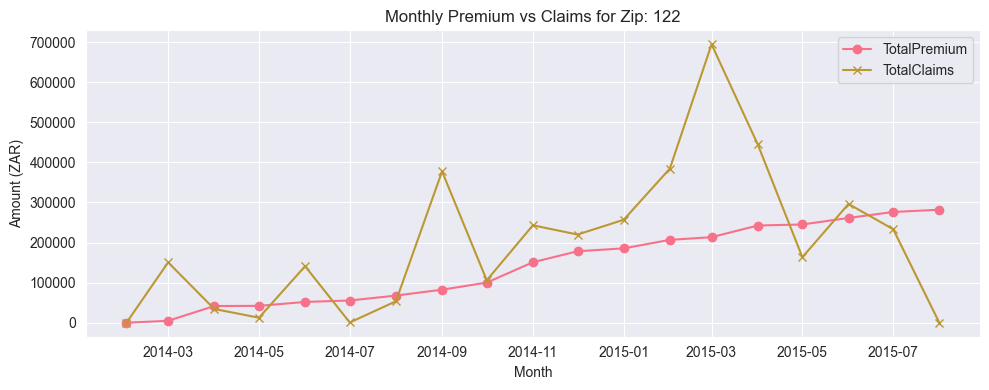

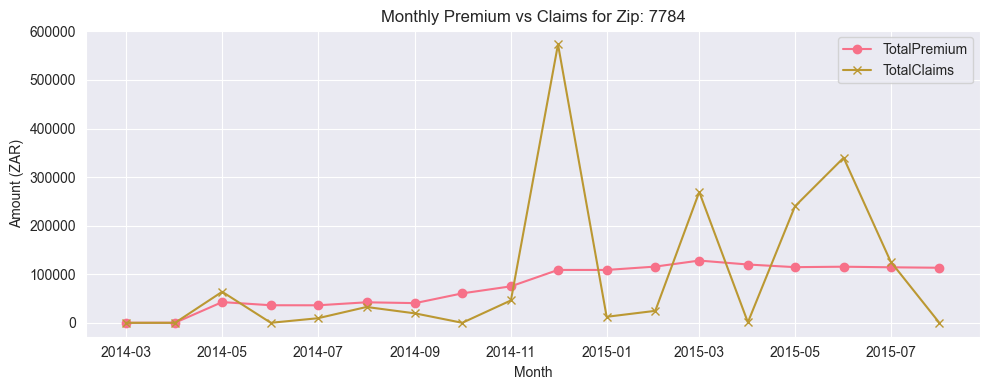

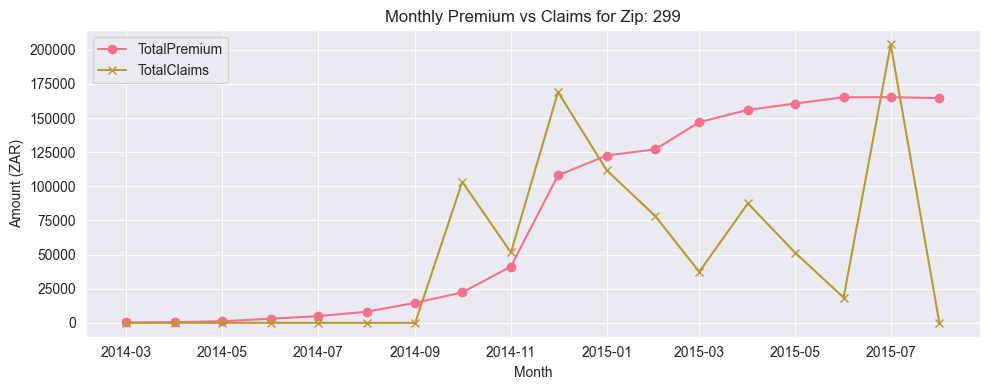

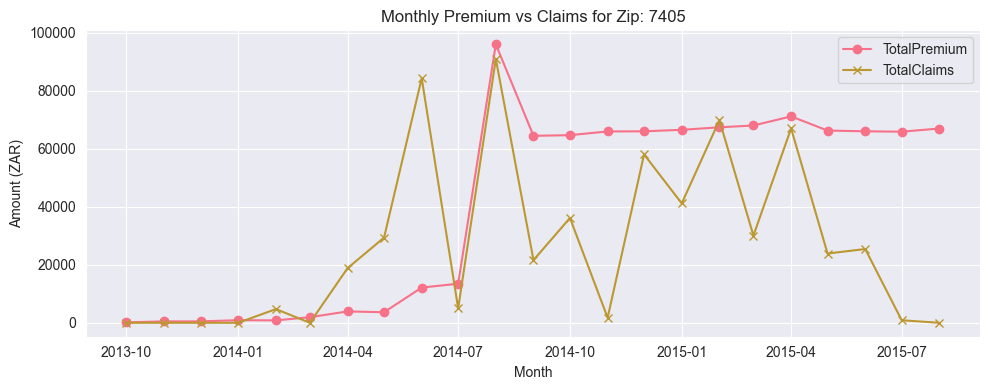

PostalCode
1748    0.994988
2000    0.799773
4360    0.729827
1460    0.712043
1682    0.683776
          ...   
1824   -0.520059
9301   -0.532449
320    -0.640804
1424   -0.644748
466    -1.000000
Length: 406, dtype: float64


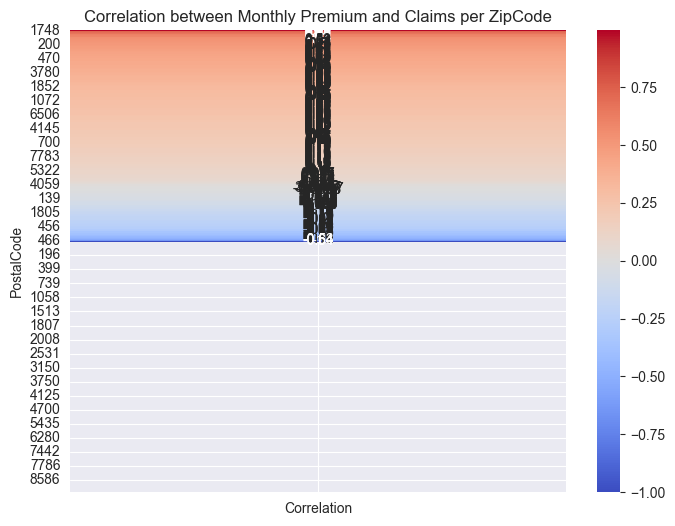

In [10]:
data.plot_correlations()